<a href="https://colab.research.google.com/github/1st9aram/dacon_house_prices/blob/main/xgboost_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import seaborn

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/dacon/house_prices_regression/")
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/dacon/house_prices_regression


In [ ]:
train = pd.read_csv('./housing/train.csv')
test = pd.read_csv('./housing/test.csv')
submission = pd.read_csv('./housing/sample_submission.csv')

In [ ]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [ ]:
y_train_col = 'target'
x_train_cols = train.columns.drop(['id', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'target'])

print(x_train_cols)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt'],
      dtype='object')


In [ ]:
x_test_cols = test.columns.drop(['id', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual'])

print(x_test_cols)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt'],
      dtype='object')


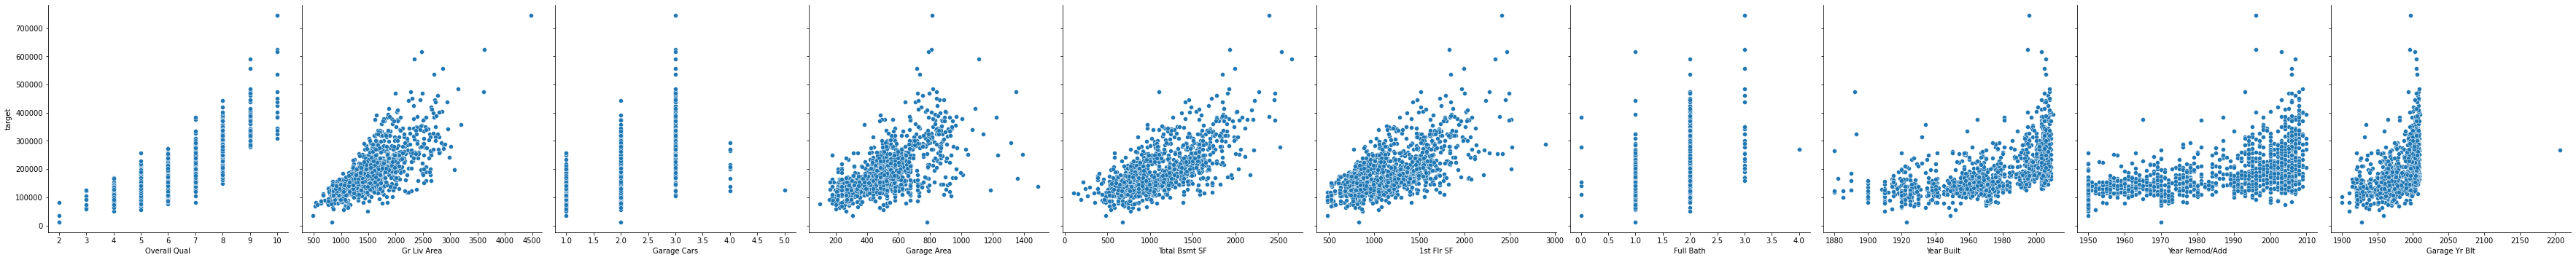

In [ ]:
seaborn.pairplot(data = train, height = 5, aspect = 1,
                 x_vars = x_train_cols,
                 y_vars = y_train_col)

In [ ]:
from sklearn import preprocessing

In [ ]:
std_scaler = preprocessing.StandardScaler()

x_train_scaled = std_scaler.fit_transform(train[x_train_cols])
x_train_scaled[:5]

array([[ 2.83443458,  1.80254651,  1.73192049,  2.43564436,  3.41044229,
         3.26607772,  0.79656467,  1.02444641,  0.88856041,  0.96689793],
       [ 0.59147638, -0.33147566,  0.19874497, -0.18824478,  0.70158298,
         0.49217089,  0.79656467,  1.12684807,  1.08711318,  1.08515772],
       [-0.90382908, -1.25895452, -1.33443054, -1.11862779, -0.56949715,
        -0.71341169, -1.01686249, -0.20437348, -0.89841451, -0.45221962],
       [-0.90382908, -0.69672176,  0.19874497,  0.386711  , -1.04875688,
        -1.30019968, -1.01686249, -2.49134383,  1.03747499,  0.84863813],
       [ 0.59147638,  0.91200265,  1.73192049,  2.2683845 , -0.14754022,
        -0.37734221,  0.79656467,  1.09271418,  0.9878368 ,  1.04573779]])

In [ ]:
x_test_scaled = std_scaler.fit_transform(train[x_test_cols])
x_test_scaled[:5]

array([[ 2.83443458,  1.80254651,  1.73192049,  2.43564436,  3.41044229,
         3.26607772,  0.79656467,  1.02444641,  0.88856041,  0.96689793],
       [ 0.59147638, -0.33147566,  0.19874497, -0.18824478,  0.70158298,
         0.49217089,  0.79656467,  1.12684807,  1.08711318,  1.08515772],
       [-0.90382908, -1.25895452, -1.33443054, -1.11862779, -0.56949715,
        -0.71341169, -1.01686249, -0.20437348, -0.89841451, -0.45221962],
       [-0.90382908, -0.69672176,  0.19874497,  0.386711  , -1.04875688,
        -1.30019968, -1.01686249, -2.49134383,  1.03747499,  0.84863813],
       [ 0.59147638,  0.91200265,  1.73192049,  2.2683845 , -0.14754022,
        -0.37734221,  0.79656467,  1.09271418,  0.9878368 ,  1.04573779]])

In [ ]:
y = train[y_train_col]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_eval, y_train, y_eval = train_test_split(x_train_scaled, y, test_size=0.2, random_state=0)

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 1000)

xgb_reg.fit(x_train, y_train)

y_pred_xgb = xgb_reg.predict(x_eval)

[07:15:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_eval.shape

(270,)

In [ ]:
y_pred_xgb.shape

(270,)

In [ ]:
result_xgb = pd.DataFrame(y_pred_xgb, index = y_eval.index).rename(columns={0: 'prediction_xgb'})

In [ ]:
result = pd.concat([y_eval, result_xgb], axis=1)
result

,target,prediction_xgb
841,135000,146842.296875
184,199900,193021.203125
526,188500,175028.421875
1283,194700,190499.890625
980,375000,274014.250000
...,...,...
1218,144000,138102.671875
1320,105500,119243.507812
1076,177625,157036.328125
906,108500,66318.937500


In [ ]:
import numpy as np

In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
result['score_xgb']=NMAE(result['target'], result['prediction_xgb'])

In [ ]:
print('XGB 의 score :', np.mean(result['score_xgb']))

XGB 의 score : 0.10342495681844455


In [ ]:
model = XGBRegressor(n_estimators=1000)
model.fit(x_train, y_train)
y_preds = model.predict(x_test_scaled)

[07:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_preds

array([391856.6  , 200926.45 , 124540.914, ..., 141951.55 , 124275.96 ,
       139746.58 ], dtype=float32)

In [ ]:
sample_submission['target'] = y_preds

sample_submission

,id,target
0,1,391856.593750
1,2,200926.453125
2,3,124540.914062
3,4,131731.578125
4,5,252510.531250
...,...,...
1345,1346,203099.062500
1346,1347,396315.906250
1347,1348,141951.546875
1348,1349,124275.960938


In [ ]:
sample_submission.to_csv('./submission_1.csv', index=False)